## Aplicação prática GNB

Para ilustrar a aplicação do Modelo Gaussiano Naive Bayes, vamos implementá-lo "from scratch" e também utilizar a biblioteca scikit-learn para classificar o conjunto de dados [Iris](https://archive.ics.uci.edu/dataset/53/iris).

### Implementação *"from Scratch"*
Primeiro, definiremos uma classe GaussianNBFromScratch que calculará as médias e variâncias para cada classe e característica, e usará essas estatísticas para fazer previsões baseadas na formulação matemática apresentada anteriormente.

In [1]:
import numpy as np

class GaussianNBFromScratch:
    """
    Implementação simplificada do Gaussian Naive Bayes para classificação.

    Atributos:
        classes (np.array): Array único das classes no conjunto de dados.
        parameters (dict): Dicionário contendo parâmetros (média, variância e priori) 
                            para cada classe.
    """
    
    def fit(self, X, y):
        """
        Treina o modelo Gaussian Naive Bayes com os dados fornecidos.

        Parâmetros:
            X (np.array): Conjunto de dados de características, onde cada linha 
                          representa uma amostra e cada coluna uma característica.
            y (np.array): Vetor de rótulos de classe para cada amostra no conjunto 
                          de dados X.
        """
        
        self.classes = np.unique(y)  # Identifica e armazena as classes únicas no vetor de rótulos
        self.parameters = {}  # Inicializa o dicionário para armazenar os parâmetros para cada classe
        
        # Calcula e armazena os parâmetros para cada classe
        for c in self.classes:
            X_c = X[y == c]  # Seleciona as amostras pertencentes à classe c
            self.parameters[c] = {
                'mean': X_c.mean(axis=0),  # Calcula a média para cada característica
                'var': X_c.var(axis=0),  # Calcula a variância para cada característica
                'prior': X_c.shape[0] / X.shape[0]  # Calcula a probabilidade a priori da classe
            }
    
    def predict(self, X):
        """
        Realiza a classificação das amostras fornecidas.

        Parâmetros:
            X (np.array): Conjunto de dados de características a serem classificadas.

        Retorna:
            np.array: Um vetor de rótulos de classe previstos para cada amostra.
        """
        y_pred = [self._predict(x) for x in X]  # Usa a função auxiliar _predict para cada amostra
        return np.array(y_pred)  # Retorna as previsões como um array numpy
    
    def _predict(self, x):
        """
        Auxiliar que calcula a classe mais provável para uma única amostra.

        Parâmetros:
            x (np.array): Uma amostra única a ser classificada.

        Retorna:
            int: A classe prevista para a amostra.
        """
        posteriors = []  # Lista para armazenar as probabilidades posteriores para cada classe
        
        # Calcula a probabilidade posterior para cada classe
        for c, params in self.parameters.items():
            prior = np.log(params['prior'])  # Log da probabilidade a priori da classe
            conditional = np.sum(np.log(self._pdf(x, params['mean'], params['var'])))  # Log da probabilidade condicional
            posterior = prior + conditional  # Log da probabilidade posterior
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]  # Retorna a classe com a maior probabilidade posterior
    
    def _pdf(self, x, mean, var):
        """
        Calcula a função densidade de probabilidade (PDF) gaussiana.

        Parâmetros:
            x (float): O valor da característica a ser avaliada.
            mean (float): A média da característica para a classe.
            var (float): A variância da característica para a classe.

        Retorna:
            float: O valor da PDF gaussiana para x.
        """
        return (1. / np.sqrt(2 * np.pi * var)) * np.exp(-(x - mean) ** 2 / (2 * var))


### Banco de dados Iris


A base de dados [Iris](https://archive.ics.uci.edu/dataset/53/iris) é um dos conjuntos de dados mais icônicos e amplamente utilizados no campo do aprendizado de máquina e estatística. Introduzida pelo estatístico britânico Ronald Fisher em 1936, ela contém 150 amostras de três espécies diferentes de flores de íris (Iris setosa, Iris virginica e Iris versicolor), cada uma com 50 amostras. Para cada amostra, são medidas e registradas quatro características: o comprimento e a largura das sépalas e das pétalas.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Carregar os dados
data = load_iris()

# Criar um dataframe pandas
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Exibir as primeiras linhas do DataFrame para verificação
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


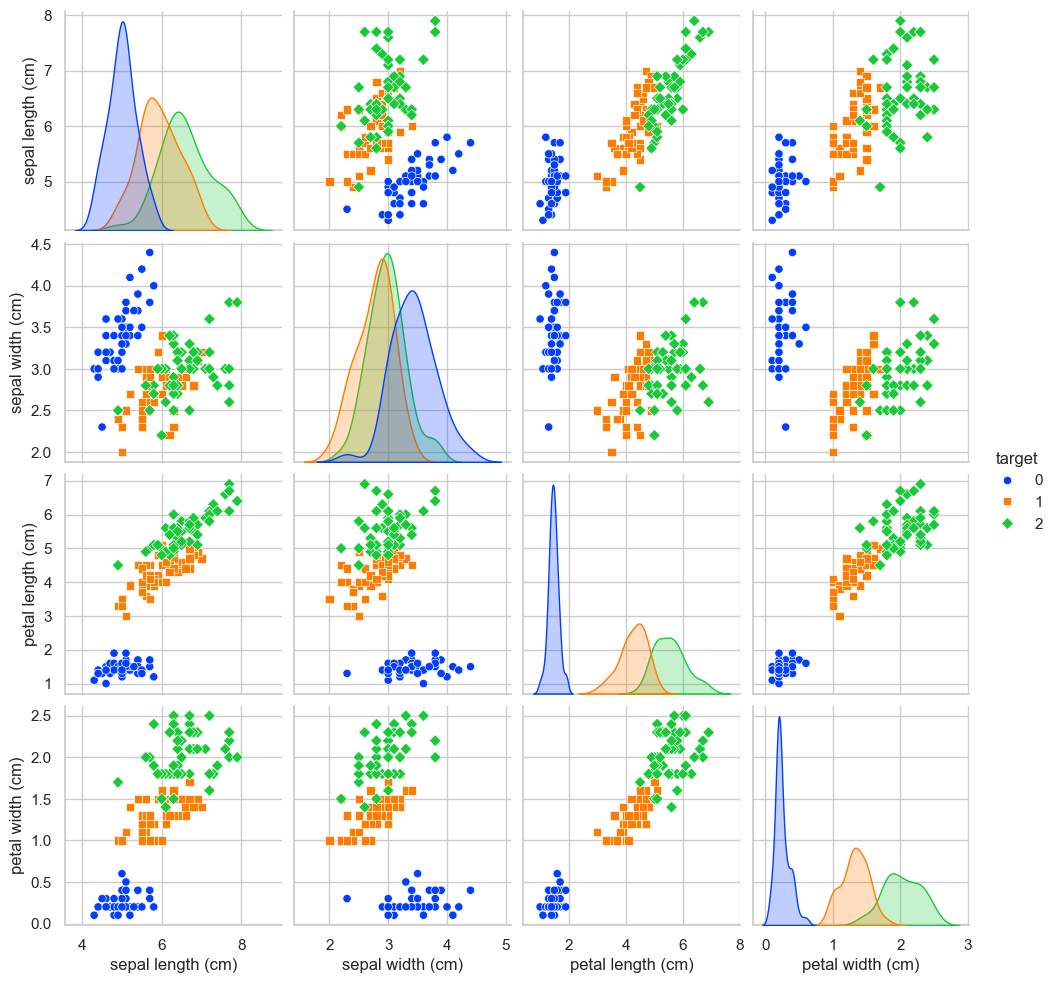

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando um pairplot com o dataset Iris
sns.pairplot(df, hue="target", diag_kind="kde", markers=["o", "s", "D"], palette="bright")

plt.show()

### Dividir os dados em treino e teste

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)  # Isso remove a coluna 'target', deixando apenas as características
y = df['target']  # Isso seleciona apenas a coluna 'target' como o alvo

# Divide dados em treinamento e teste, como um proporção de 70 e 30%, respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo *"from scratch"*

In [5]:
# Criar instância do modelo 
model_from_scratch = GaussianNBFromScratch()
# Treinar o modelo
model_from_scratch.fit(X_train, y_train)

### Modelo Scikit-learn 

In [6]:
from sklearn.naive_bayes import GaussianNB

# Inicializar e treinar o modelo
model_sklearn = GaussianNB()
model_sklearn.fit(X_train, y_train)

GaussianNB()

### Avaliar os modelos 

In [7]:
from sklearn.metrics import accuracy_score

# Fazer previsões e avaliar os modelos
y_pred_from_scratch = model_sklearn.predict(X_test)
accuracy_from_scratch = accuracy_score(y_test, y_pred_from_scratch)

y_pred_sklearn = model_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Acurácia do nosso modelo from scratch: {accuracy_from_scratch:.2f}")
print(f"Acurácia do modelo sklearn: {accuracy_sklearn:.2f}")

Acurácia do nosso modelo from scratch: 0.98
Acurácia do modelo sklearn: 0.98
